#### STEP 0: Import nova_grad library

In [37]:
from nova_grad.neural_network import MultiLayerPerceptron
import matplotlib.pyplot as plt

#### STEP 1: Set out the training data and desired predictions 

In [38]:
xs = [
    [2.0, 3.0, -1.0],
    [-3.0, 7.0, 4.0],
    [1.0, -9.0, 3.0],
    [5.0, 13.0, 1.0]
]
ys = [1.0, -1.0, -1.0, 1.0]

#### STEP 2: Initialise a MultiLayerPerceptron NN

In [39]:
n = MultiLayerPerceptron(3, [4, 4, 1])

#### STEP 3: Make an initial prediction using the NN, with random weights and bias'

In [40]:
ypred = [n(x) for x in xs]
ypred

[Scalar(0.208), Scalar(0.350), Scalar(0.267), Scalar(0.248)]

#### STEP 4: Run 500 forward/backprop cycles and observe the reduction in the loss function

In [41]:
x = []
y = []

for k in range(100):
    # forward pass
    ypred = [n(x) for x in xs]
    loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
    
    # zero grad
    n.zero_grad()
    loss.backward()

    # backward pass
    for p in n.parameters():
        p.data += -0.05 * p.grad

    # capture loss over the cycles
    x.append(k)
    y.append(loss.data)

#### STEP 5: Visualise the gradient descent

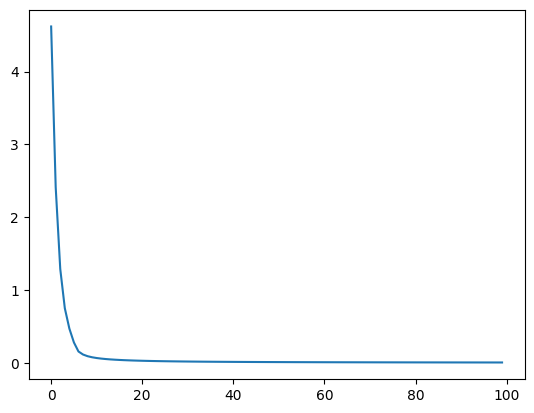

In [42]:
plt.plot(x, y)

#### STEP 6: Compare the predictions and the desired outcomes to see improvements

In [43]:
list(zip(ypred, ys))

[(Scalar(0.960), 1.0),
 (Scalar(-0.959), -1.0),
 (Scalar(-0.988), -1.0),
 (Scalar(0.964), 1.0)]